In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
ruta3 = r'https://github.com/gmarinr/TOPD/raw/refs/heads/main/Archivos/GRD_Completo.parquet' #Correo a brcarom@udd.cl por si no te sirve la ruta
df_GRD = pd.read_parquet(ruta3)
df_GRD.head(2)

,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,DESCCRIPCION_GRD,Versión,Descripción,Categoría,Sección,Capítulo,NEXT_FECHA_INGRESO,DIAS_REINGRESO,READM_7D,READM_30D,READM_60D,READM_90D,PROCEDIMIENTO1,PROCEDIMIENTO2,PROCEDIMIENTO3,PROCEDIMIENTO4,PROCEDIMIENTO5,PROCEDIMIENTO6,PROCEDIMIENTO7,PROCEDIMIENTO8,PROCEDIMIENTO9,PROCEDIMIENTO10,PROCEDIMIENTO11,PROCEDIMIENTO12,PROCEDIMIENTO13,PROCEDIMIENTO14,PROCEDIMIENTO15,PROCEDIMIENTO16,PROCEDIMIENTO17,PROCEDIMIENTO18,PROCEDIMIENTO19,PROCEDIMIENTO20,PROCEDIMIENTO21,PROCEDIMIENTO22,PROCEDIMIENTO23,PROCEDIMIENTO24,PROCEDIMIENTO25,PROCEDIMIENTO26,PROCEDIMIENTO27,PROCEDIMIENTO28,PROCEDIMIENTO29,PROCEDIMIENTO30
0,66988070.0,HOMBRE,1977-07-12,METROPOLITANO SURORIENTE,URGENCIA,2023-03-29,2023-04-13,DOMICILIO,1.1263,3.0,2.0,46.0,15,Complejo Hospitalario Dr. Sótero del Río (San...,"MH DISFUNCIÓN, REACCIÓN O COMPL. POR DISP., I...",CIE-v2013,Falla y rechazo de trasplante de riñón,T86 FALLA Y RECHAZO DEL TRASPLANTE DE ÓRGANOS ...,T80-T88 COMPLICACIONES DE LA ATENCIÓN QUIRÚRG...,"Cap.19 LESIONES TRAUMÁTICAS, ENVENENAMIENTOS ...",2023-06-22,70.0,0,0,0,1,5523.0,8703.0,8744.0,8952.0,8875.0,9039.0,9059.0,8929.0,9132.0,9139.0,8906.0,8913.0,9318.0,68.0,3891.0,8966.0,99.21,99.19,99.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66988070.0,HOMBRE,1977-07-12,METROPOLITANO SURORIENTE,URGENCIA,2023-03-29,2023-04-13,DOMICILIO,1.1263,3.0,2.0,46.0,15,Complejo Hospitalario Dr. Sótero del Río (San...,"MH DISFUNCIÓN, REACCIÓN O COMPL. POR DISP., I...",CIE-v2013,Falla y rechazo de trasplante de riñón,T86 FALLA Y RECHAZO DEL TRASPLANTE DE ÓRGANOS ...,T80-T88 COMPLICACIONES DE LA ATENCIÓN QUIRÚRG...,"Cap.19 LESIONES TRAUMÁTICAS, ENVENENAMIENTOS ...",2023-06-22,70.0,0,0,0,1,9671.0,9604.0,9396.0,9059.0,8966.0,8929.0,9132.0,8875.0,9039.0,9312.0,9318.0,9394.0,9919.0,966.0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Análisis Descriptivo en función de Sección
Para este caso, necesitamos ver cómo distribuyen esos y centrarnos en las secciones que realmente importan 

In [5]:
df_GRD['Sección'].unique()
df_GRD['Sección'].value_counts(normalize=True)


Sección
Z40-Z54  CONTACTOS PARA OTRA ATENCIÓN ESPECÍFICA DE SALUD                                         0.148265
H25-H28  TRASTORNOS DEL CRISTALINO                                                                0.050613
C81-C96  NEOPLASIA MALIGNA DE TEJIDOS LINFOIDE, HEMOPOÝETICO Y RELACIONADOS                       0.033624
T80-T88  COMPLICACIONES DE LA ATENCIÓN QUIRÚRGICA Y MÉDICA, NO CLASIFICADAS BAJO OTRO CONCEPTO    0.032944
O20-O29  OTROS TRASTORNOS MATERNOS RELACIONADOS PRINCIPALMENTE CON EL EMBARAZO                    0.032774
                                                                                                    ...   
R47-R49  SÍNTOMAS Y SIGNOS QUE AFECTAN AL HABLA Y A LA VOZ                                        0.000008
B90-B94  SECUELAS DE ENFERMEDADES INFECCIOSAS Y PARASITARIAS                                      0.000008
B95-B97  AGENTES INFECCIOSOS BACTERIANOS Y VIRALES                                                0.000004
A65-A69  OTRAS ENFERMEDADES P

# Selección de secciones para el análisis
Para centrar nuestro estudio en diagnósticos clínicos bien definidos y con suficiente representación, seguimos estos pasos:  

Excluimos secciones administrativas, de seguimiento o síntomas inespecíficos (rangos Z00–Z99, R00–R99, V01–Y98), pues no aportan información sobre un tratamiento concreto ni un cuadro clínico claro.  

Priorizamos secciones con un alto volumen de casos y relevancia clínica, quedándonos con aquellas cuyos prefijos corresponden a:  

1. H25–H28: Trastornos del cristalino (~5,06 % del total)
2. C81–C96: Neoplasias malignas de tejidos linfoide, hemopoyético y relacionados (~3,36 %)
3. T80–T88: Complicaciones de la atención quirúrgica y médica (~3,29 %)
4. O20–O29: Otros trastornos maternos relacionados principalmente con el embarazo (~3,28 %)
  
Con esto, enfocamos el análisis descriptivo y predictivo en grupos de alto interés clínico y con muestra suficiente para entrenar modelos robustos.

In [8]:
# 2) Definimos las secciones objetivo por su prefijo
selected_prefixes = ['H25-H28', 'C81-C96', 'T80-T88', 'O20-O29']

# 3) Filtramos por aquellas filas cuya 'Sección' comienza con uno de los prefijos
mask = df_GRD['Sección'].str.split().str[0].isin(selected_prefixes)
df_filtered = df_GRD[mask].copy()

# (Opcional) Verificamos cuántos registros quedaron
print(f"Registros totales tras filtrado: {len(df_filtered)}")

Registros totales tras filtrado: 107013


In [9]:
df_filtered['Sección'].unique()

array(['T80-T88  COMPLICACIONES DE LA ATENCIÓN QUIRÚRGICA Y MÉDICA, NO CLASIFICADAS BAJO OTRO CONCEPTO',
       'H25-H28  TRASTORNOS DEL CRISTALINO',
       'O20-O29  OTROS TRASTORNOS MATERNOS RELACIONADOS PRINCIPALMENTE CON EL EMBARAZO',
       'C81-C96  NEOPLASIA MALIGNA DE TEJIDOS LINFOIDE, HEMOPOÝETICO Y RELACIONADOS'],
      dtype=object)

In [10]:
# Ventanas temporales definidas en el DataFrame
window_cols = ['READM_7D', 'READM_30D', 'READM_60D', 'READM_90D']
total = len(df_filtered)

print("Tasas globales de reingreso:")
for w in window_cols:
    count = df_filtered[w].sum()
    print(f"  • {w}: {count:,} pacientes ({count/total:.2%})")


Tasas globales de reingreso:
  • READM_7D: 24,474 pacientes (22.87%)
  • READM_30D: 64,706 pacientes (60.47%)
  • READM_60D: 81,809 pacientes (76.45%)
  • READM_90D: 90,819 pacientes (84.87%)


In [21]:
# 3) Tasa READM_30D por sección
tasa_sec = df_GRD.groupby('Sección')['READM_30D'].mean().sort_values(ascending=False)
print("\nTasa de READM_30D por sección:")
for sec, val in tasa_sec.items():
    print(f"  • {sec}: {val*100:.2f}%")



Tasa de READM_30D por sección:
  • B90-B94  SECUELAS DE ENFERMEDADES INFECCIOSAS Y PARASITARIAS: 100.00%
  • L55-L59  TRASTORNOS DE LA PIEL Y DEL TEJIDO SUBCUTÁNEO RELACIONADOS CON LA RADIACIÓN: 100.00%
  • P10-P15  TRAUMATISMO AL NACIMIENTO: 98.07%
  • P80-P83  ALTERACIONES QUE AFECTAN A LA PIEL Y LOS ANEJOS Y A LA REGULACIÓN DE LA TEMPERATURA DEL RECIÉN NACIDO: 88.36%
  • C40-C41  NEOPLASIAS MALIGNAS DE HUESO Y DE CARTÍLAGO ARTICULAR: 88.33%
  • D70-D77  OTROS TRASTORNOS DE LA SANGRE Y DE LOS ÓRGANOS HEMATOPOYÉTICOS: 86.83%
  • O00-O08  EMBARAZO CON RESULTADO ABORTIVO: 85.89%
  • T29-T32  QUEMADURAS Y CORROSIONES DE REGIONES CORPORALES MÚLTIPLES Y LAS NO ESPECIFICADAS: 84.73%
  • C81-C96  NEOPLASIA MALIGNA DE TEJIDOS LINFOIDE, HEMOPOÝETICO Y RELACIONADOS: 84.02%
  • Z40-Z54  CONTACTOS PARA OTRA ATENCIÓN ESPECÍFICA DE SALUD: 83.89%
  • E70-E88  ALTERACIONES METABÓLICAS: 83.22%
  • Q90-Q99  ANOMALÍAS CROMOSÓMICAS, NO CLASIFICADAS BAJO OTRO CONCEPTO: 82.18%
  • T14-T14  TRAUMATISMO EN 

In [12]:
# Solo pacientes que reingresaron al menos una vez
reingresados = df_filtered[df_filtered['READM_30D'] == 1]

# Estadísticas básicas de DIAS_REINGRESO
desc = reingresados['DIAS_REINGRESO'].describe().astype(int)
print("\nDistribución de DIAS_REINGRESO (pacientes con READM_30D == 1):")
print(desc)



Distribución de DIAS_REINGRESO (pacientes con READM_30D == 1):
count    64706
mean        12
std          8
min          1
25%          6
50%         11
75%         18
max         30
Name: DIAS_REINGRESO, dtype: int64


In [24]:
reing = df_GRD[df_GRD['READM_30D']==1]
print("\nDIAS_REINGRESO – estadísticos clave:")
print(reing['DIAS_REINGRESO'].describe().round(1))


DIAS_REINGRESO – estadísticos clave:
count    420507.0
mean         11.3
std           8.4
min           1.0
25%           4.0
50%           9.0
75%          17.0
max          30.0
Name: DIAS_REINGRESO, dtype: float64


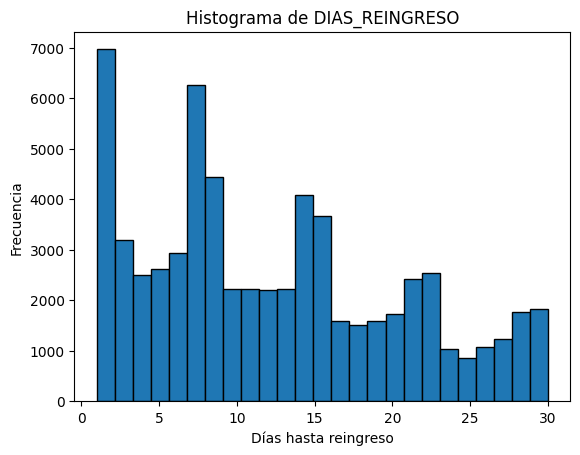

In [19]:
plt.hist(reingresados['DIAS_REINGRESO'], bins=25, edgecolor='black')
plt.xlabel("Días hasta reingreso")
plt.ylabel("Frecuencia")
plt.title("Histograma de DIAS_REINGRESO")
plt.show()


In [25]:
proc_cols = [f"PROCEDIMIENTO{i}" for i in range(1,31)]
# Convertir a numérico y apilar
all_proc = (
    pd.to_numeric(reing[proc_cols].stack(), errors='coerce')
      .dropna()
      .astype(int)
)
print("\nTop 10 procedimientos en reingresos (30d):")
print(all_proc.value_counts().head(10))



Top 10 procedimientos en reingresos (30d):
9929    255606
9059    194674
9921    126490
9923     85096
9925     77888
9919     71752
8952     60565
9918     60548
9039     58392
99       55342
Name: count, dtype: int64


In [16]:
# Comparar severidad y peso medio según READM_30D
grouped = df_filtered.groupby('READM_30D')[['IR_29301_SEVERIDAD','IR_29301_PESO']].mean()
print("\nSeveridad y peso promedio según reingreso en 30 días:")
print(grouped)



Severidad y peso promedio según reingreso en 30 días:
           IR_29301_SEVERIDAD  IR_29301_PESO
READM_30D                                   
0                    1.045950       0.829748
1                    1.278159       1.216893


Trabajamos en análisis Descriptivos adicionales para profundizar en las características del reingreso


Edad – reingreso vs. no reingreso:
              count  mean   std  min   25%   50%   75%    max
READM_30D                                                    
0          293138.0  48.4  26.0  0.0  29.0  55.0  70.0  103.0
1          420507.0  38.5  27.0  0.0  13.0  36.0  63.0  105.0


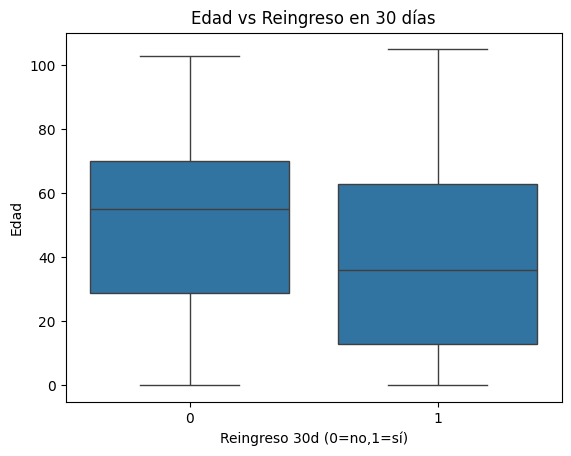

In [28]:
# Estadísticas de edad
print("Edad – reingreso vs. no reingreso:")
print(df_GRD.groupby('READM_30D')['EDAD'].describe().round(1))

# Boxplot de edad
plt.figure()
sns.boxplot(x='READM_30D', y='EDAD', data=df_GRD)
plt.xlabel("Reingreso 30d (0=no,1=sí)")
plt.ylabel("Edad")
plt.title("Edad vs Reingreso en 30 días")
plt.show()



% Reingreso en 30d por sexo:
READM_30D     0     1
SEXO                 
HOMBRE     40.4  59.6
MUJER      41.6  58.4


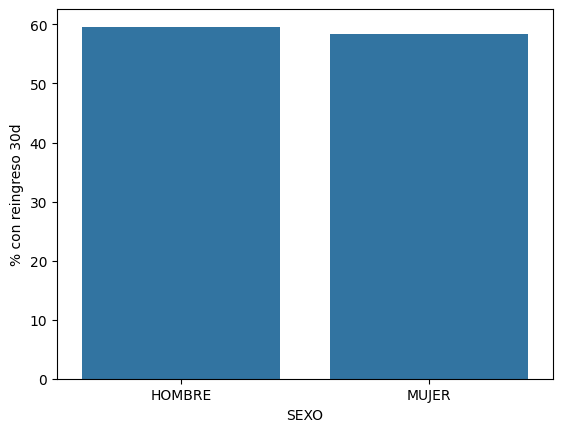

In [34]:
ct = pd.crosstab(df_GRD['SEXO'], df_GRD['READM_30D'], normalize='index')*100
print("\n% Reingreso en 30d por sexo:")
print(ct.round(1))
sns.barplot(x=ct.index, y=ct[1])
plt.ylabel("% con reingreso 30d")
plt.show()


| Sección     | Tasa READM\_30D | Interpretación                                                                                                                                                                       |
| ----------- | --------------: | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **H25–H28** |         54.17 % | Trastornos del cristalino (p. ej. cataratas). Más de la mitad reingresa en 30 días—sugiere complicaciones post-quirúrgicas o seguimientos agudos tras cirugía oftálmica.             |
| **C81–C96** |         84.02 % | Neoplasias malignas linfáticas/hematopoyéticas. Tasa muy alta de reingreso refleja la necesidad de múltiples ciclos de tratamiento (quimioterapia, complicaciones inmunosupresoras). |
| **T80–T88** |         50.48 % | Complicaciones de atención quirúrgica/médica. Un 1 de cada 2 pacientes reingresa: confirma que es un grupo de alto riesgo donde hay que profundizar en tipos de complicación.        |
| **O20–O29** |         56.07 % | Trastornos maternos del embarazo. Más de la mitad reingresa en 30 días, probablemente por emergencias obstétricas o control de complicaciones (preeclampsia, hemorragias).           |
